In [ ]:
import numpy as np
import pandas as pd
import os

!dir

sample_data  Website\ Phishing.csv


In [ ]:
# Single layer perceptron implementation

In [ ]:
def calculate_precision(arr):
    precision=[]
    for i in range(len(arr)):
        sumVal=0
        for j in range(len(arr)):
            sumVal+=arr[i][j]
        precision.append(arr[i][i]/sumVal)
    return precision

In [ ]:
def calculate_accuracy(arr):
    leading_diagonal=0
    for i in range(0, len(arr)):
        leading_diagonal+=arr[i][i]
    return leading_diagonal/sum(sum(np.array(arr)))

def calculate_recall(arr):
    recall=[]
    for i in range(len(arr)):
        sumVal=0
        for j in range(len(arr)):
            sumVal+=arr[j][i]
        recall.append(arr[i][i]/sumVal)
    return recall

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.05, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i > 0 else 0 for i in y])
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
# Training the model
data = pd.read_csv("/content/Website Phishing.csv")
data.head(10)
x=data.values.tolist()
training_data=[i[:-1] for i in x]
label_value=[i[-1] for i in x]
testing_data=training_data[int(len(training_data)*.8):]
test_label_value=label_value[int(len(training_data)*.8):]
perceptron_model=Perceptron()
perceptron_model.fit(np.array(training_data), np.array(label_value))

accuracy: 0.45018450184501846
precision:  [0.0, 0.36363636363636365, 0.9421487603305785]
recall:  [nan, 0.061068702290076333, 0.8142857142857143]


<ipython-input-16-41a0660f3888>:13: RuntimeWarning: invalid value encountered in long_scalars
  recall.append(arr[i][i]/sumVal)


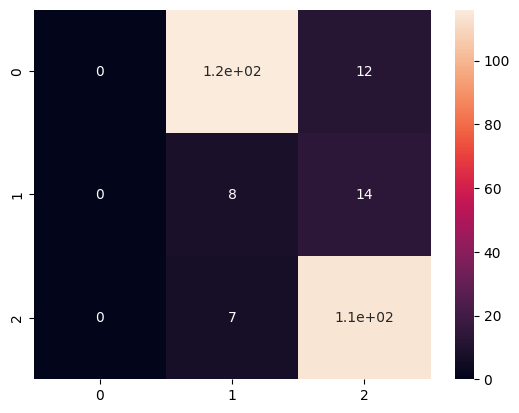

In [ ]:
# Prediction
import seaborn as sns
import random as r
from sklearn.metrics import confusion_matrix
perceptron_predictions= perceptron_model.predict(testing_data)

c=confusion_matrix(test_label_value, perceptron_predictions)
sns.heatmap(c, annot=True)

perceptron_accuracy=calculate_accuracy(c)
perceptron_precision=calculate_precision(c)
perceptron_recall=calculate_recall(c)

print("accuracy:", perceptron_accuracy)
print("precision: ", perceptron_precision)
print("recall: ", perceptron_recall)

In [ ]:
# multilayer perceptron with backpropagation
from sklearn.neural_network import MLPClassifier
X = [i[:-1] for i in x]
y = [i[-1] for i in x]
clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(15,7), random_state=1, max_iter=4000)
clf.fit(X, y)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(15, 7), max_iter=4000,
              random_state=1, solver='lbfgs')

accuracy: 0.9600886917960089
precision:  [0.9629629629629629, 0.9611650485436893, 0.9562043795620438]
recall:  [0.9684813753581661, 0.9166666666666666, 0.9579524680073126]


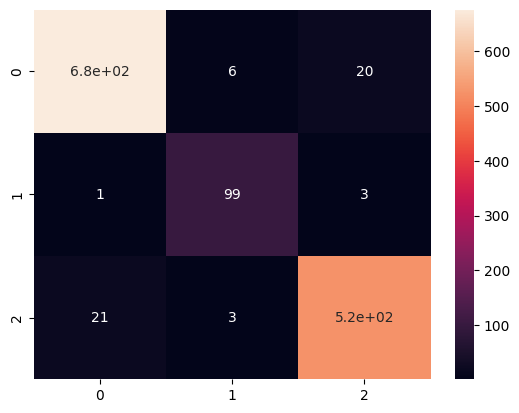

In [ ]:
# multilayer perceptron prediction
X=[i[:-1] for i in x]
multilayer_perceptron_results=[]
for i in range(len(training_data)):
    res=clf.predict([X[i]])
    multilayer_perceptron_results.append(res[0])

c=confusion_matrix(label_value, multilayer_perceptron_results)
sns.heatmap(c, annot=True)

multilayer_perceptron_accuracy=calculate_accuracy(c)
multilayer_perceptron_precision=calculate_precision(c)
multilayer_perceptron_recall=calculate_recall(c)

print("accuracy:", multilayer_perceptron_accuracy)
print("precision: ", multilayer_perceptron_precision)
print("recall: ", multilayer_perceptron_recall)

In [ ]:
# ADALINE

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

adl = make_pipeline(StandardScaler(),SGDClassifier(max_iter=10000, tol=1e-6))
adl.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=10000, tol=1e-06))])

accuracy: 0.8233555062823356
precision:  [0.905982905982906, 0.02912621359223301, 0.8667883211678832]
recall:  [0.8401585204755614, 0.3333333333333333, 0.8091993185689949]


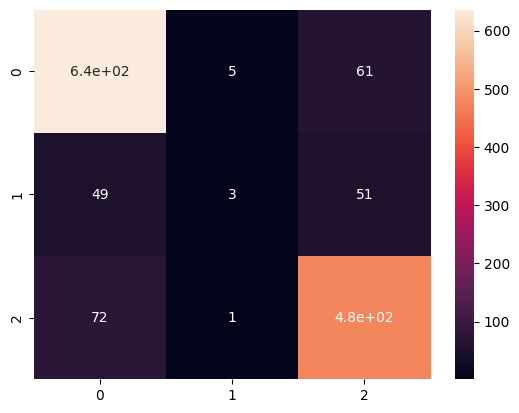

In [ ]:
adaline_results=[]
X=[i[:-1] for i in x]
for i in range(len(training_data)):
    res=adl.predict([X[i]])
    adaline_results.append(res[0])

c=confusion_matrix(label_value, adaline_results)
sns.heatmap(c, annot=True)

adaline_accuracy=calculate_accuracy(c)
adaline_precison=calculate_precision(c)
adaline_recall=calculate_recall(c)

print("accuracy:", adaline_accuracy)
print("precision: ", adaline_precison)
print("recall: ", adaline_recall)